In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Visualizing Data

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df.corr()[np.abs(df.corr())>0.4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.466581
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.000000,0.436783,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,0.436783,1.000000,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.466581,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [7]:
X=df

In [8]:
y=df['Outcome']

In [9]:
X.pop('Outcome');

# Without PreProcessing

In [10]:
alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

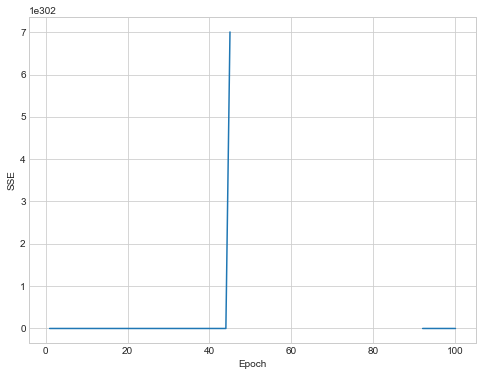

In [11]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

# Preprocessing

## Scaling

## 1. Standardization 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

/Users/nilansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/nilansh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

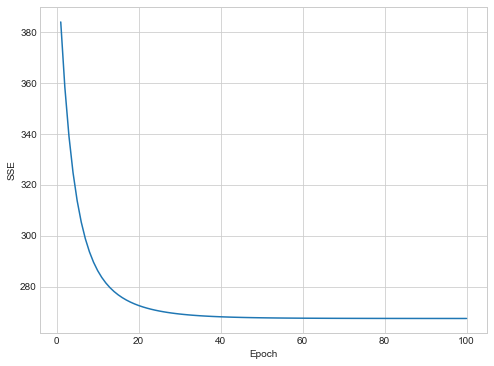

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

## 2.Min Max Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
min_max_sc=MinMaxScaler()

In [19]:
mn_x=min_max_sc.fit_transform(X)
mn_y=min_max_sc.fit_transform(y.reshape(-1,1)).flatten()

/Users/nilansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/nilansh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
alpha = 0.0001
w_ = np.zeros(1 + mn_x.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(mn_x, w_[1:]) + w_[0]
    errors = (mn_y - y_pred)
    
    w_[1:] += alpha * mn_x.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

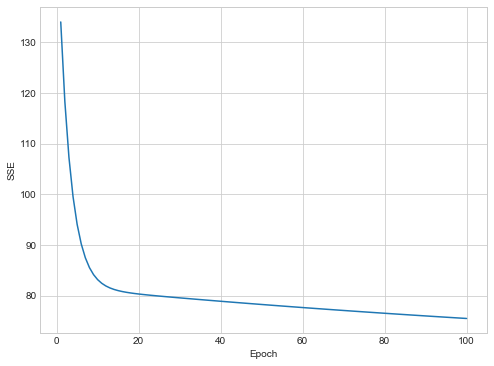

In [21]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

## 3. Normalisation

In [22]:
from sklearn.preprocessing import Normalizer

In [23]:
nm_sc=Normalizer()

In [24]:
nm_x=nm_sc.fit_transform(X)
nm_y=nm_sc.fit_transform(y.reshape(-1,1)).flatten()

/Users/nilansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [25]:
alpha = 0.0001
w_ = np.zeros(1 + nm_x.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(nm_x, w_[1:]) + w_[0]
    errors = (nm_y - y_pred)
    
    w_[1:] += alpha * nm_x.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

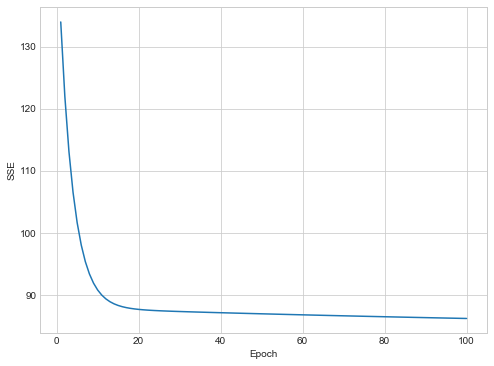

In [26]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [27]:
X_std=pd.DataFrame(X_std,columns=X.columns)

In [28]:
X_std.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Dividing into test and train datasets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Performance Parameters

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

## SVM

### 1. Linear Kernel , C=0.001

In [33]:
from sklearn.svm import SVC

In [34]:
C=0.001
clf=SVC(kernel='linear',C=C)

In [35]:
clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.7752

Classification Report: 
              precision    recall  f1-score   support

          0       0.79      0.89      0.84       401
          1       0.73      0.56      0.63       213

avg / total       0.77      0.78      0.77       614


Confusion Matrix: 
 [[356  45]
 [ 93 120]]

Average Accuracy: 	 0.7672
Accuracy SD: 		 0.0404


### 2. Linear Kernel , C=0.01

In [39]:
C=0.01
clf=SVC(kernel='linear',C=C)

In [40]:
clf.fit(X_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.7752

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.88      0.84       401
          1       0.72      0.57      0.64       213

avg / total       0.77      0.78      0.77       614


Confusion Matrix: 
 [[354  47]
 [ 91 122]]

Average Accuracy: 	 0.7671
Accuracy SD: 		 0.0340


### 3. Linear Kernel , C=0.1 

In [42]:
C=0.1
clf=SVC(kernel='linear',C=C)

In [43]:
clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.7736

Classification Report: 
              precision    recall  f1-score   support

          0       0.79      0.89      0.84       401
          1       0.73      0.56      0.63       213

avg / total       0.77      0.77      0.77       614


Confusion Matrix: 
 [[356  45]
 [ 94 119]]

Average Accuracy: 	 0.7671
Accuracy SD: 		 0.0384


### 4. Linear Kernel, C=1.0

In [70]:
C=0.1
clf=SVC(kernel='linear',C=C)
clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.7736

Classification Report: 
              precision    recall  f1-score   support

          0       0.79      0.89      0.84       401
          1       0.73      0.56      0.63       213

avg / total       0.77      0.77      0.77       614


Confusion Matrix: 
 [[356  45]
 [ 94 119]]

Average Accuracy: 	 0.7671
Accuracy SD: 		 0.0384


### 5. Rbf Kernel , C=0.001

In [53]:
C=0.001
clf=SVC(kernel='rbf',C=C)

In [54]:
clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.6531

Classification Report: 
              precision    recall  f1-score   support

          0       0.65      1.00      0.79       401
          1       0.00      0.00      0.00       213

avg / total       0.43      0.65      0.52       614


Confusion Matrix: 
 [[401   0]
 [213   0]]

Average Accuracy: 	 0.6531
Accuracy SD: 		 0.0042


/Users/nilansh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 6. Rbf Kernel , C=0.01

In [56]:
C=0.01
clf=SVC(kernel='rbf',C=C)
clf.fit(X_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.6531

Classification Report: 
              precision    recall  f1-score   support

          0       0.65      1.00      0.79       401
          1       0.00      0.00      0.00       213

avg / total       0.43      0.65      0.52       614


Confusion Matrix: 
 [[401   0]
 [213   0]]

Average Accuracy: 	 0.6531
Accuracy SD: 		 0.0042


/Users/nilansh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 7. Rbf Kernel , C=0.1

In [58]:
C=0.1
clf=SVC(kernel='rbf',C=C)
clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.6531

Classification Report: 
              precision    recall  f1-score   support

          0       0.65      1.00      0.79       401
          1       0.00      0.00      0.00       213

avg / total       0.43      0.65      0.52       614


Confusion Matrix: 
 [[401   0]
 [213   0]]

Average Accuracy: 	 0.6531
Accuracy SD: 		 0.0042


/Users/nilansh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 8. Rbf Kernel , C=1

In [68]:
C=0.1
clf=SVC(kernel='rbf',C=C)
clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)

Train Result:

accuracy score: 0.6531

Classification Report: 
              precision    recall  f1-score   support

          0       0.65      1.00      0.79       401
          1       0.00      0.00      0.00       213

avg / total       0.43      0.65      0.52       614


Confusion Matrix: 
 [[401   0]
 [213   0]]

Average Accuracy: 	 0.6531
Accuracy SD: 		 0.0042


/Users/nilansh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 9. Poly Kernel, C=0.001, degree=3

In [ ]:
C=0.001
clf=SVC(kernel='poly',C=C,degree=3)
clf.fit(X_train,y_train)

In [ ]:
print_score(clf, X_train,y_train,X_test,y_test, train = True)